
# CODE TO PREDICT CAR PURCHASING DOLLAR AMOUNT USING ANNs (REGRESSION TASK)
# Dr. Ryan Ahmed @STEMplicity
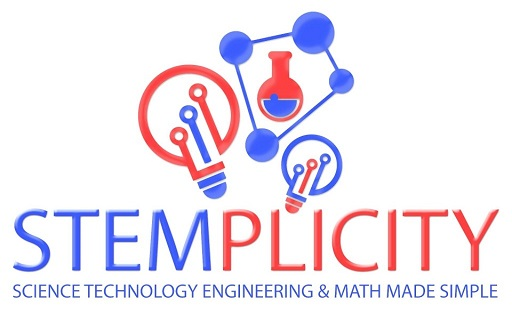



# PROBLEM STATEMENT

You are working as a car salesman and you would like to develop a model to predict the total dollar amount that customers are willing to pay given the following attributes: 
- Customer Name
- Customer e-mail
- Country
- Gender
- Age
- Annual Salary 
- Credit Card Debt 
- Net Worth 

The model should predict: 
- Car Purchase Amount 

# STEP #0: LIBRARIES IMPORT


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# STEP #1: IMPORT DATASET

In [2]:
car_df = pd.read_csv('Car_Purchasing_Data.csv', encoding='ISO-8859-1')


In [3]:
car_df

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
5,Carla Hester,mi@Aliquamerat.edu,Liberia,1,56.824893,68499.85162,14179.472440,428485.3604,56611.99784
6,Griffin Rivera,vehicula@at.co.uk,Syria,1,46.607315,39814.52200,5958.460188,326373.1812,28925.70549
7,Orli Casey,nunc.est.mollis@Suspendissetristiqueneque.co.uk,Czech Republic,1,50.193016,51752.23445,10985.696560,629312.4041,47434.98265
8,Marny Obrien,Phasellus@sedsemegestas.org,Armenia,0,46.584745,58139.25910,3440.823799,630059.0274,48013.61410
9,Rhonda Chavez,nec@nuncest.com,Somalia,1,43.323782,53457.10132,12884.078680,476643.3544,38189.50601


# STEP #2: VISUALIZE DATASET

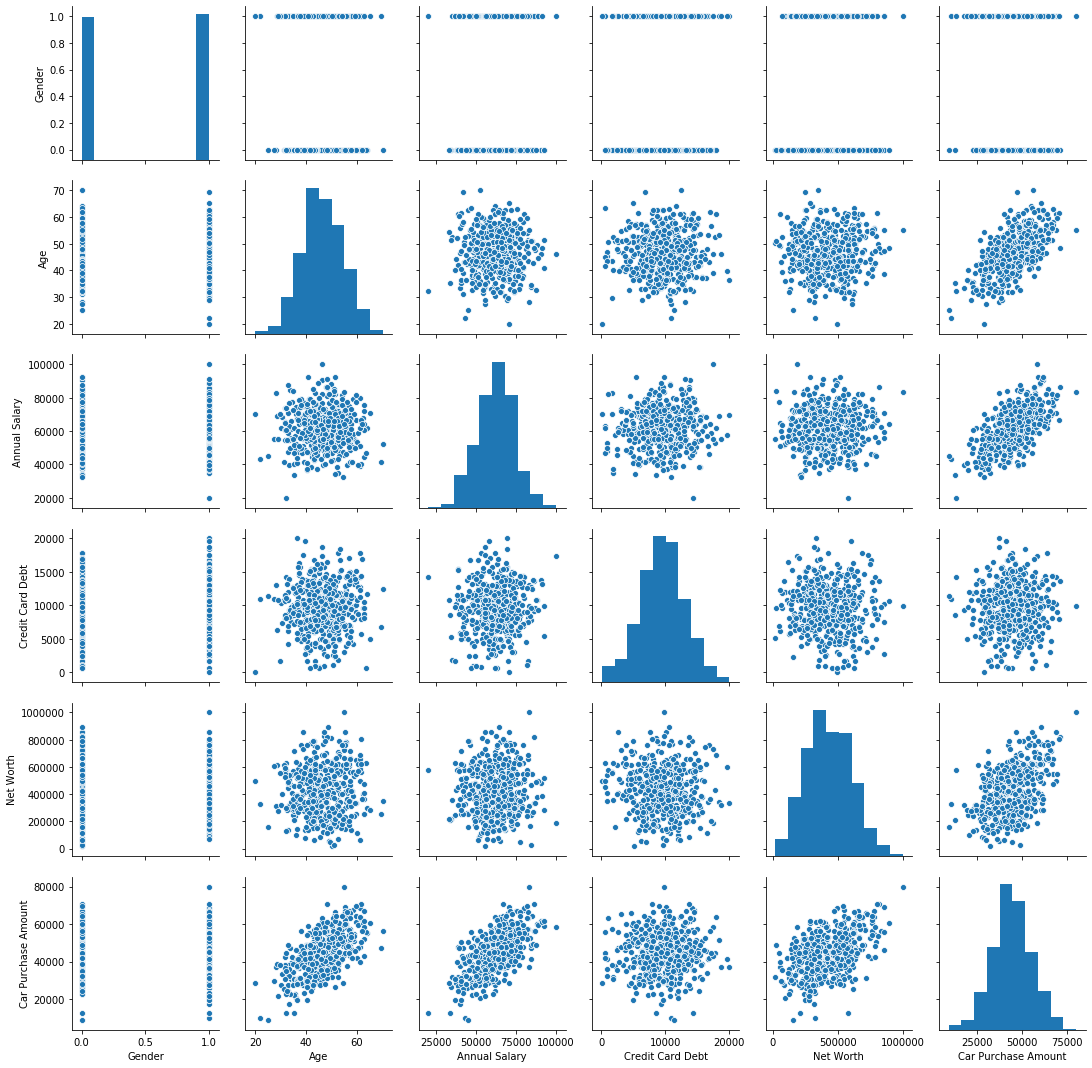

In [4]:
sns.pairplot(car_df)

# STEP #3: CREATE TESTING AND TRAINING DATASET/DATA CLEANING

In [5]:
X = car_df.drop(['Customer Name', 'Customer e-mail', 'Country', 'Car Purchase Amount'], axis = 1)

In [6]:
X

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth
0,0,41.851720,62812.09301,11609.380910,238961.2505
1,0,40.870623,66646.89292,9572.957136,530973.9078
2,1,43.152897,53798.55112,11160.355060,638467.1773
3,1,58.271369,79370.03798,14426.164850,548599.0524
4,1,57.313749,59729.15130,5358.712177,560304.0671
5,1,56.824893,68499.85162,14179.472440,428485.3604
6,1,46.607315,39814.52200,5958.460188,326373.1812
7,1,50.193016,51752.23445,10985.696560,629312.4041
8,0,46.584745,58139.25910,3440.823799,630059.0274
9,1,43.323782,53457.10132,12884.078680,476643.3544


In [7]:
y = car_df['Car Purchase Amount']
y.shape

(500,)

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler_x = MinMaxScaler()
X_scaled = scaler_x.fit_transform(X)


In [9]:
scaler_x.data_max_

array([1.e+00, 7.e+01, 1.e+05, 2.e+04, 1.e+06])

In [10]:
scaler_x.data_min_

array([    0.,    20., 20000.,   100., 20000.])

In [11]:
print(X_scaled)

[[0.         0.4370344  0.53515116 0.57836085 0.22342985]
 [0.         0.41741247 0.58308616 0.476028   0.52140195]
 [1.         0.46305795 0.42248189 0.55579674 0.63108896]
 ...
 [1.         0.67886994 0.61110973 0.52822145 0.75972584]
 [1.         0.78321017 0.37264988 0.69914746 0.3243129 ]
 [1.         0.53462305 0.51713347 0.46690159 0.45198622]]


In [12]:
X_scaled.shape

(500, 5)

In [13]:
y.shape

(500,)

In [14]:
y = y.values.reshape(-1,1)

In [15]:
y.shape

(500, 1)

In [16]:
y

array([[35321.45877],
       [45115.52566],
       [42925.70921],
       [67422.36313],
       [55915.46248],
       [56611.99784],
       [28925.70549],
       [47434.98265],
       [48013.6141 ],
       [38189.50601],
       [59045.51309],
       [42288.81046],
       [28700.0334 ],
       [49258.87571],
       [49510.03356],
       [53017.26723],
       [41814.72067],
       [43901.71244],
       [44633.99241],
       [54827.52403],
       [51130.95379],
       [43402.31525],
       [47240.86004],
       [46635.49432],
       [45078.40193],
       [44387.58412],
       [37161.55393],
       [49091.97185],
       [58350.31809],
       [43994.35972],
       [17584.56963],
       [44650.36073],
       [66363.89316],
       [53489.46214],
       [39810.34817],
       [51612.14311],
       [38978.67458],
       [10092.22509],
       [35928.52404],
       [54823.19221],
       [45805.67186],
       [41567.47033],
       [28031.20985],
       [27815.73813],
       [68678.4352 ],
       [68

In [17]:
scaler_y = MinMaxScaler()

y_scaled = scaler_y.fit_transform(y)


In [18]:
y_scaled

array([[0.37072477],
       [0.50866938],
       [0.47782689],
       [0.82285018],
       [0.66078116],
       [0.67059152],
       [0.28064374],
       [0.54133778],
       [0.54948752],
       [0.4111198 ],
       [0.70486638],
       [0.46885649],
       [0.27746526],
       [0.56702642],
       [0.57056385],
       [0.61996151],
       [0.46217916],
       [0.49157341],
       [0.50188722],
       [0.64545808],
       [0.59339372],
       [0.48453965],
       [0.53860366],
       [0.53007738],
       [0.50814651],
       [0.49841668],
       [0.3966416 ],
       [0.56467566],
       [0.6950749 ],
       [0.49287831],
       [0.12090943],
       [0.50211776],
       [0.80794216],
       [0.62661214],
       [0.43394857],
       [0.60017103],
       [0.42223485],
       [0.01538345],
       [0.37927499],
       [0.64539707],
       [0.51838974],
       [0.45869677],
       [0.26804521],
       [0.2650104 ],
       [0.84054134],
       [0.84401542],
       [0.35515157],
       [0.406

# STEP#4: TRAINING THE MODEL

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.25)

In [20]:
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler

model = Sequential()
model.add(Dense(25, input_dim=5, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 25)                150       
_________________________________________________________________
dense_2 (Dense)              (None, 25)                650       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 26        
Total params: 826
Trainable params: 826
Non-trainable params: 0
_________________________________________________________________


Using TensorFlow backend.


In [21]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
epochs_hist = model.fit(X_train, y_train, epochs=20, batch_size=25,  verbose=1, validation_split=0.2)


# STEP#5: EVALUATING THE MODEL 

In [26]:
print(epochs_hist.history.keys())


dict_keys(['val_loss', 'loss'])


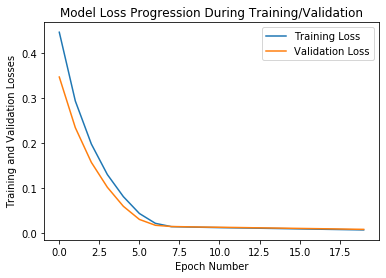

In [27]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])

plt.title('Model Loss Progression During Training/Validation')
plt.ylabel('Training and Validation Losses')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss', 'Validation Loss'])


In [1]:
# Gender, Age, Annual Salary, Credit Card Debt, Net Worth 

# ***(Note that input data must be normalized)***

X_test_sample = np.array([[0, 0.4370344,  0.53515116, 0.57836085, 0.22342985]])
#X_test_sample = np.array([[1, 0.53462305, 0.51713347, 0.46690159, 0.45198622]])

y_predict_sample = model.predict(X_test_sample)

print('Expected Purchase Amount=', y_predict_sample)
y_predict_sample_orig = scaler_y.inverse_transform(y_predict_sample)
print('Expected Purchase Amount=', y_predict_sample_orig)

NameError: name 'np' is not defined

# EXCELLENT JOB! NOW YOU'VE MASTERED THE USE OF ANNs FOR REGRESSION TASKS! 